<a href="https://colab.research.google.com/github/robertoarturomc/Visualizacion/blob/main/7_Introducci%C3%B3n_a_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import datetime
import re

import matplotlib.pyplot as plt
import seaborn as sns

# Hay varios estilos que se pueden hacer para cambiar los parámetros default de nuestros gráficos;
# El estilo "ggplot" imita el estilo de las gráficas de la popular librería "ggplot2" de R.
plt.style.use('ggplot')

import wordcloud
#from wordcloud import WordCloud, STOPWORDS

# 7. Introducción a Text Analytics
Text analytics (Análisis de Texto) es la capacidad de sacar información valiosa a partir del lenguaje escrito utilizado por la persona. 

La presencia de ciertas palabras, el contexto, la variedad de palabras, nos pueden dar información importante sobre el problema a analizar.

En el camino, también mejoraremos la forma en la que trabajamos con datos en formato de fechas.

## Datos de Twitter
Un ejemplo típico de sets de datos es utilizar información de la Red Social Twitter. Cada tuit es un mensaje único, público en su mayoría, que puede aportar información sobre la persona o sobr eun conjunto de personas.

Para extraerlos, se suelen usar APIs...que, al cierre de esta clase (9 de marzo de 2023), el nuevo dueño de Twitter piensa cambiar y quizá dejar inservibles para este propósito.

In [2]:
tweets  = pd.read_csv("https://raw.githubusercontent.com/JoaquinAmatRodrigo/Estadistica-con-R/master/datos/datos_tweets_@elonmusk.csv")
tweets.head()

,screen_name,user_id,created_at,status_id,text,retweet_count,favorite_count,is_quote_status,quote_status_id,is_retweet,...,hashtags,coordinates,place_id,place_type,place_name,place_full_name,country_code,country,bounding_box_coordinates,bounding_box_type
0,elonmusk,44196397,2017-11-09T17:28:57Z,9.286758e+17,"""If one day, my words are against science, cho...",49919,104722,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,elonmusk,44196397,2017-11-09T17:12:46Z,9.286717e+17,I placed the flowers\n\nThree broken ribs\nA p...,5940,33725,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,elonmusk,44196397,2017-11-08T18:55:13Z,9.283351e+17,Atatürk Anıtkabir https://t.co/al3wt0njr6,34752,104823,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,elonmusk,44196397,2017-11-07T19:48:45Z,9.279862e+17,"@Bob_Richards One rocket, slightly toasted",415,7247,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,elonmusk,44196397,2017-10-28T21:36:18Z,9.243894e+17,@uncover007 500 ft so far. Should be 2 miles l...,207,2128,False,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tweets = tweets[["status_id", "created_at", "text"]]
tweets.columns = ["ID", "Fecha", "Texto"]
tweets.head()

,ID,Fecha,Texto
0,9.286758e+17,2017-11-09T17:28:57Z,"""If one day, my words are against science, cho..."
1,9.286717e+17,2017-11-09T17:12:46Z,I placed the flowers\n\nThree broken ribs\nA p...
2,9.283351e+17,2017-11-08T18:55:13Z,Atatürk Anıtkabir https://t.co/al3wt0njr6
3,9.279862e+17,2017-11-07T19:48:45Z,"@Bob_Richards One rocket, slightly toasted"
4,9.243894e+17,2017-10-28T21:36:18Z,@uncover007 500 ft so far. Should be 2 miles l...


### Distribución de tuits por mes

In [4]:
# Primero, extraemos sólo el año-mes de nuestra fecha, ignorando los días y horas.
# Cambiamos a formato "datetime"
tweets["Fecha"] = pd.to_datetime(tweets.Fecha)

# Cambiamos todas las fechas al primero de cada mes
tweets["Mes"] = tweets.Fecha.apply(lambda x: datetime.datetime(x.year, x.month, 1))
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,"""If one day, my words are against science, cho...",2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,I placed the flowers\n\nThree broken ribs\nA p...,2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,Atatürk Anıtkabir https://t.co/al3wt0njr6,2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,"@Bob_Richards One rocket, slightly toasted",2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. Should be 2 miles l...,2017-10-01


In [5]:
tuits_mensual = tweets.groupby("Mes")[["Fecha"]].count()
tuits_mensual.head()

,Fecha
Mes,
2013-03-01,34
2013-04-01,64
2013-05-01,119
2013-06-01,31
2013-07-01,14


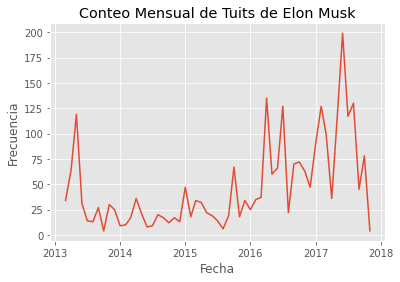

In [6]:
# Recordatorio: los datos de fechas quedan mejor graficándolos con gráficos de línea
plt.plot(tuits_mensual.index, tuits_mensual.Fecha)
plt.title("Conteo Mensual de Tuits de Elon Musk")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")

plt.show()

Como nuestras fechas están en formato "datetime", nuestro gráfico se vuelve "inteligente" y no muestra toooodas las fechas únicas, sino que sólo muestra los años, en este caso, para optimizar el espacio.

Si trabajaramos con los strings originales, tendríamos algo así:

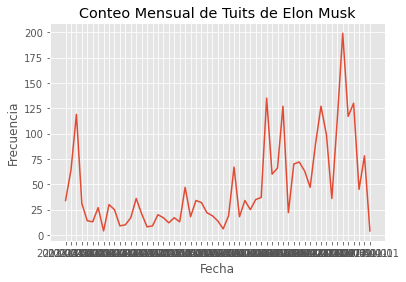

In [7]:
tuits_mensual.index = tuits_mensual.index.astype("str")

plt.plot(tuits_mensual.index, tuits_mensual.Fecha)
plt.title("Conteo Mensual de Tuits de Elon Musk")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")

plt.show()

Nota: la clase de hoy utiliza material creado por Joaquín Amat Rodrigo: https://www.cienciadedatos.net/documentos/py25-text-mining-python.html

## Limpieza general de Texto:

Hay diversas tareas necesarias al tratar con Textos. 

Para algunas, echaremos mano de la librería `regex`. *Regex:* (Regular Expresions) es una herramienta común, dentro de muchísimos lenguajes de programación, para manipular textos.

Algunas tareas comúnes son:

1. Convertir todo el texto a mayúsculas/minúsculas.

Esto, para tratar igual las formas distintas escribir: "Roberto", "roberto", "ROBERTO", etc.

In [8]:
tweets["Texto"] = tweets["Texto"].str.lower()
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,"""if one day, my words are against science, cho...",2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,i placed the flowers\n\nthree broken ribs\na p...,2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,atatürk anıtkabir https://t.co/al3wt0njr6,2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,"@bob_richards one rocket, slightly toasted",2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,@uncover007 500 ft so far. should be 2 miles l...,2017-10-01


2. Quitar signos de puntuación.



In [9]:
# El backslash - \, sirve para "escapar" caracteres especiales.
codigo_regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'

tweets["Texto"] = tweets["Texto"].apply(lambda x: re.sub(codigo_regex, " ", x) )
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,if one day my words are against science cho...,2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,i placed the flowers\n\nthree broken ribs\na p...,2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,atatürk anıtkabir https t co al3wt0njr6,2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,bob richards one rocket slightly toasted,2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,uncover007 500 ft so far should be 2 miles l...,2017-10-01


3. Quitar números.

In [10]:
codigo_regex = '[0-9]'

tweets["Texto"] = tweets["Texto"].apply(lambda x: re.sub(codigo_regex, " ", x) )
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,if one day my words are against science cho...,2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,i placed the flowers\n\nthree broken ribs\na p...,2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,atatürk anıtkabir https t co al wt njr,2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,bob richards one rocket slightly toasted,2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,uncover ft so far should be miles l...,2017-10-01


4. Quitar espacios dobles, nuevas líneas, etc.

In [11]:
# Los espacios, tabuladores, enter vienen codificados de una forma especial:
codigo_regex = '[\n\t]'
tweets["Texto"] = tweets["Texto"].apply(lambda x: re.sub(codigo_regex, "", x) )
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,if one day my words are against science cho...,2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,i placed the flowersthree broken ribsa pierced...,2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,atatürk anıtkabir https t co al wt njr,2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,bob richards one rocket slightly toasted,2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,uncover ft so far should be miles l...,2017-10-01


5. Separar el texto en palabras distintas.

A este paso se le puede llamar "tokenizacion"

In [12]:
tweets["Texto"] = tweets["Texto"].apply(lambda x: x.split(sep = ' ') )
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,"[, if, one, day, , my, words, are, against, sc...",2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,"[i, placed, the, flowersthree, broken, ribsa, ...",2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,"[atatürk, anıtkabir, https, , , t, co, al, wt,...",2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,"[, bob, richards, one, rocket, , slightly, toa...",2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,"[, uncover, , , , , , , , ft, so, far, , shoul...",2017-10-01


6. Eliminar palabras de dos o menos caracteres.

Varias de esas son letras solas, proposiciones, otras *stopwords*, etc.

In [18]:
tweets["Texto"] = tweets["Texto"].apply(lambda x: [token for token in x if len(token) > 3] )
tweets.head()

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,"[words, against, science, choose, science, mus...",2017-11-01
1,9.286717e+17,2017-11-09 17:12:46+00:00,"[placed, flowersthree, broken, ribsa, pierced,...",2017-11-01
2,9.283351e+17,2017-11-08 18:55:13+00:00,"[atatürk, anıtkabir, https]",2017-11-01
3,9.279862e+17,2017-11-07 19:48:45+00:00,"[richards, rocket, slightly, toasted]",2017-11-01
4,9.243894e+17,2017-10-28 21:36:18+00:00,"[uncover, should, miles, long, three, four, mo...",2017-10-01


Posteriormente, podemos cambiar nuestr columna `Texto` de formato, "explotando" el dataframe para que cada palabra quede en un renglón individual.

In [19]:
tweets_tidy = tweets.explode(column='Texto')
tweets_tidy

,ID,Fecha,Texto,Mes
0,9.286758e+17,2017-11-09 17:28:57+00:00,words,2017-11-01
0,9.286758e+17,2017-11-09 17:28:57+00:00,against,2017-11-01
0,9.286758e+17,2017-11-09 17:28:57+00:00,science,2017-11-01
0,9.286758e+17,2017-11-09 17:28:57+00:00,choose,2017-11-01
0,9.286758e+17,2017-11-09 17:28:57+00:00,science,2017-11-01
...,...,...,...,...
2677,3.105503e+17,2013-03-10 00:39:02+00:00,with,2013-03-01
2677,3.105503e+17,2013-03-10 00:39:02+00:00,shervin,2013-03-01
2677,3.105503e+17,2013-03-10 00:39:02+00:00,travisk,2013-03-01
2677,3.105503e+17,2013-03-10 00:39:02+00:00,http,2013-03-01


Vemos que, en el dataset, Elon Musk utilizó 29630 palabras. ¿Cuántas de estas fueron palabras únicas?

In [20]:
tweets_tidy.Texto.nunique()

6858

¿Qué palabras utiliza Elon Musk con mayor frecuencia?

In [21]:
tweets_tidy.Texto.value_counts()

https            545
that             315
will             289
tesla            272
http             241
                ... 
headline           1
sarahfkessler      1
lotte              1
visas              1
lmjbw              1
Name: Texto, Length: 6858, dtype: int64

Varias parecen ser palabras relacionadas con tecnología, especialmente varias de páginas web. ¿Se podrá crear una visualización con estos datos?


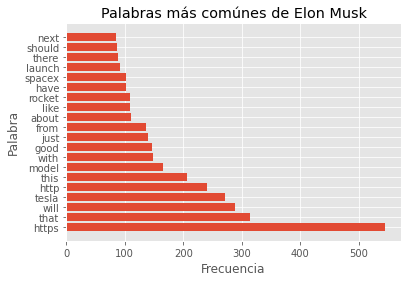

In [23]:
# Me limito a las 20 palabras más comúnes
to_plot = tweets_tidy.Texto.value_counts().head(20)
plt.barh(to_plot.index, to_plot)
plt.title("Palabras más comúnes de Elon Musk")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

Sin embargo, seguro hay formas más entretenidas de graficar esto...


## Wordcloud (nube de palabras)
La forma más común de visualizar textos es con este tipo de gráfico. A mayor tamaño de la palabra, mayor es su frecuencia.

In [28]:
# Primero, unimos tooodos los strings
textos = " ".join(cat for cat in tweets_tidy.Texto)
textos

'words against science choose science mustafa kemal atatürk placed flowersthree broken ribsa pierced lungand still foughtfor peace https meekf zntm atatürk anıtkabir https richards rocket slightly toasted uncover should miles long three four months hopefully stretch whole https bfoqykjg picture boring company tunnel taken yesterday https tfdvkyxfsj just want express word appreciation hard work tesla gigafactory team reason camped https nztp bslw whiskey fire s’mores jcalso hotdog hotdog https cxwbzywb campfire gigafactory roof https jkxakuzvzy just feed godfather movies input what’s worst that could happen https lorengrush verge it’s true verge groan list people should absolutely allowed develop digital superintelligence https renz fgnc nextspaceflight jamesbarr yeah exactly need sherlock holmes jamesharvey even need most time atlasobscura reminder youth year generous civilization even flash https fxednxjwoh apta info baltimoresun ready proper announcement maybe month maryland been htt

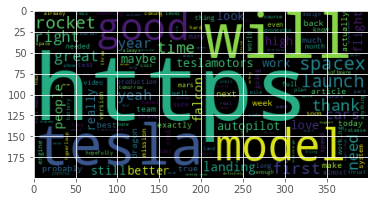

In [38]:
word_cloud = wordcloud.WordCloud().generate(textos)

plt.imshow(word_cloud)
plt.show()

Y como siempre, podemos jugar con los parámetros para tener una mejor visualización...

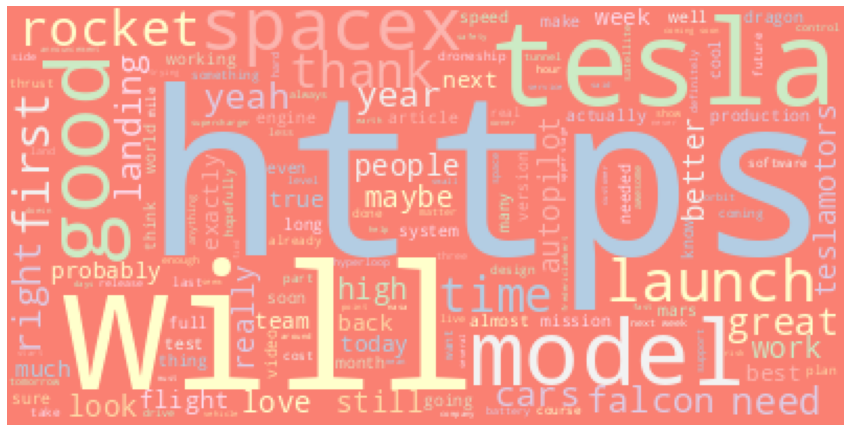

In [39]:
word_cloud = wordcloud.WordCloud(background_color="salmon", colormap="Pastel1").generate(textos)

# plt.figure cambia mi "canvas", el espacio donde ando dibujando gráficos.
plt.figure(figsize=[15,8])
plt.imshow(word_cloud)

# plt.axis("off") quita los ejes; en este caso, sólo estorban.
plt.axis("off")
plt.show()